In [2]:
# importing required libraries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import numpy as np

In [4]:
#  Ideal Low Pass Filtering
def lowPassFiltering(img,Filter_size):
    
    img_dft = np.fft.fft2(img)
    img_dft_shift =  np.fft.fftshift(img_dft)  # Move frequency domain from upper left to middle
    
    #Getting image properties
    height, width = img_dft_shift.shape[0:2]
    
    #Find the center point of the Fourier spectrum to apply filter Filter in right position
    center_x,center_y = int( height/2), int(width/2)
    
    #Define a blank black image with the same size as the FFT Image
    mask_img = np.zeros((height, width), np.uint8)
    
    #Center point plus or minus half of the filter size, forming a filter size that defines the size, then set to 1, preserving the low frequency part
    mask_img[center_x-int(Filter_size/2):center_x+int(Filter_size/2), center_y-int(Filter_size/2):center_y+int(Filter_size/2)] = 1
    fft_new_img=mask_img*img_dft_shift #A low-pass filter is obtained by multiplying the defined low-pass filter with the incoming Fourier spectrogram one-to-one.
    
    # Inverse Fourier Transform
    idft_shift = np.fft.ifftshift(fft_new_img)  # Move the frequency domain from the middle to the upper left corner
    new_img = np.fft.ifft2(idft_shift)  # Fourier inverse function 
    new_img = np.abs(new_img)
    return new_img



In [5]:
# Ideal High Pass Filtering
def HighPassFiltering(img,Filter_size):

    img_fft = np.fft.fft2(img)
    img_fft_shift =  np.fft.fftshift(img_fft)  # Move frequency domain from upper left to middle
    
    #Getting image properties
    height, width = img_fft_shift.shape[0:2]
    
    #Define a blank black image with the same size as the FFT Image
    mask_img = np.ones((height, width), np.uint8)
   
    #Find the center point of the Fourier spectrum to apply filter Filter in right position
    center_x,center_y = int( height/2), int(width/2)
    mask_img[center_x-int(Filter_size/2):center_x+int(Filter_size/2), center_y-int(Filter_size/2):center_y+int(Filter_size/2)] = 0#Center point plus or minus half of the filter size, forming a filter size that defines the size, then set to 0    
    new_fft_img=mask_img*img_fft_shift
    
    # Inverse Fourier Transform
    ifft_shift = np.fft.ifftshift(new_fft_img)  # Move the frequency domain from the middle to the upper left corner
    new_img = np.fft.ifft2(ifft_shift)  # Fourier inverse function 
    new_img = np.abs(new_img)
    return new_img

Text(0.5, 1.0, 'Low pass filter')

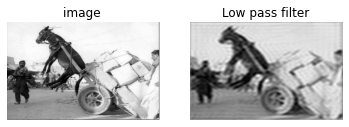

In [6]:
fig = plt.figure()
image= Image.open("images/img5.png").convert('L')

fig.add_subplot(1,2,1)
plt.imshow(image ,cmap='gray')
plt.axis('off')
plt.title("image ")


# Low-pass filter
lowpass_filtered_img= lowPassFiltering(image,55)
fig.add_subplot(1,2,2)
plt.imshow(lowpass_filtered_img,cmap='gray')
plt.axis('off')
plt.title("Low pass filter")


Text(0.5, 1.0, 'High pass filter')

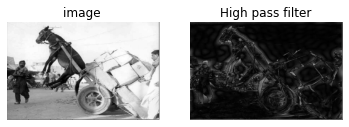

In [7]:

fig2 = plt.figure()
fig2.add_subplot(1,2,1)
plt.imshow(image ,cmap='gray')
plt.axis('off')
plt.title("image ")

# High-pass filter
Highpass_filtered_img= HighPassFiltering(image,20)
fig2.add_subplot(1,2,2)
plt.imshow(Highpass_filtered_img,cmap='gray')
plt.axis('off')
plt.title("High pass filter")


In [8]:
#hybrid images 
def hybrid_image(img1 ,img2):

  min_shape =(min(img1.size[0], img2.size[0]),
              min(img1.size[1], img2.size[1]))
  src_img1_resized = img1.resize(min_shape)
  src_img2_resized = img2.resize(min_shape)

   # Apply filters
  image1_dft = HighPassFiltering(src_img1_resized,40)
  image2_dft = lowPassFiltering(src_img2_resized,100)
  hybrid_image = image1_dft + image2_dft
  return hybrid_image

Text(0.5, 1.0, 'Hyprid_image ')

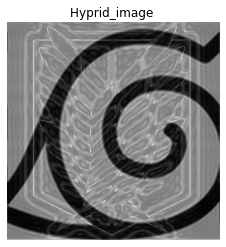

In [9]:
img1= Image.open("images/h11.png").convert('L')
img2= Image.open("images/h22.png").convert('L')
hybrid=hybrid_image(img1 ,img2)

fig3=plt.figure()
fig3.add_subplot(1,1,1)
plt.imshow(hybrid ,cmap='gray')
plt.axis('off')
plt.title("Hyprid_image ")